In [84]:
import pandas as pd # Library for Dataframes 
import numpy as np # Library for math functions
import pickle # Python object serialization library. Not secure
import matplotlib.pyplot as plt


# TEXT REPRESENTATION

## Basic Text Vectorization

### One hot encoding

In [4]:
documents = ["Dog bites man.", "Man bites dog.", "Dog eats meat.", "Man eats food."]
processed_docs = [doc.lower().replace(".","") for doc in documents]
processed_docs

['dog bites man', 'man bites dog', 'dog eats meat', 'man eats food']

In [5]:
#Build the vocabulary
vocab = {}
count = 0
for doc in processed_docs:
    for word in doc.split():
        if word not in vocab:
            count = count +1
            vocab[word] = count
print(vocab)

{'dog': 1, 'bites': 2, 'man': 3, 'eats': 4, 'meat': 5, 'food': 6}


In [6]:
def get_onehot_vector(somestring):
    onehot_encoded = []
    for word in somestring.split():
        temp = [0]*len(vocab)
        if word in vocab:
            temp[vocab[word]-1] = 1 # -1 is to take care of the fact indexing in array starts from 0 and not 1
        onehot_encoded.append(temp)
    return onehot_encoded

In [7]:
print(processed_docs[1])
get_onehot_vector(processed_docs[1]) #one hot representation for a text from our corpus.

man bites dog


[[0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0]]

In [8]:
# One hot encoding using scikit-learn

S1 = 'dog bites man'
S2 = 'man bites dog'
S3 = 'dog eats meat'
S4 = 'man eats food'

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

data = [S1.split(), S2.split(), S3.split(), S4.split()]
values = data[0]+data[1]+data[2]+data[3]
print("The data: ",values)

#Label Encoding
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print("Label Encoded:",integer_encoded)

#One-Hot Encoding
onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(data).toarray()
print("Onehot Encoded Matrix:\n",onehot_encoded)

The data:  ['dog', 'bites', 'man', 'man', 'bites', 'dog', 'dog', 'eats', 'meat', 'man', 'eats', 'food']
Label Encoded: [1 0 4 4 0 1 1 2 5 4 2 3]
Onehot Encoded Matrix:
 [[1. 0. 1. 0. 0. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 0.]]


### Bag of Words

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

#look at the documents list
print("Our corpus: ", processed_docs)

count_vect = CountVectorizer()
#Build a BOW representation for the corpus
bow_rep = count_vect.fit_transform(processed_docs)

#Look at the vocabulary mapping
print("Our vocabulary: ", count_vect.vocabulary_)

#see the BOW rep for first 2 documents
print("BoW representation for 'dog bites man': ", bow_rep[0].toarray())
print("BoW representation for 'man bites dog: ",bow_rep[1].toarray())

#Get the representation using this vocabulary, for a new text
temp = count_vect.transform(["dog and dog are friends"])
print("Bow representation for 'dog and dog are friends':", temp.toarray())

Our corpus:  ['dog bites man', 'man bites dog', 'dog eats meat', 'man eats food']
Our vocabulary:  {'dog': 1, 'bites': 0, 'man': 4, 'eats': 2, 'meat': 5, 'food': 3}
BoW representation for 'dog bites man':  [[1 1 0 0 1 0]]
BoW representation for 'man bites dog:  [[1 1 0 0 1 0]]
Bow representation for 'dog and dog are friends': [[0 2 0 0 0 0]]


In the above code, we represented the text considering the frequency of words into account. However, sometimes, we don't care about frequency much, but only want to know whether a word appeared in a text or not. That is, each document is represented as a vector of 0s and 1s. We will use the option binary=True in CountVectorizer for this purpose.


In [10]:
#BoW with binary vectors
count_vect = CountVectorizer(binary=True)
count_vect.fit(processed_docs)
temp = count_vect.transform(["dog and dog are friends"])
print("Bow representation for 'dog and dog are friends':", temp.toarray())

Bow representation for 'dog and dog are friends': [[0 1 0 0 0 0]]


### Bag of N-gram words

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

#Ngram vectorization example with count vectorizer and uni, bi, trigrams
count_vect = CountVectorizer(ngram_range=(1,3))

#Build a BOW representation for the corpus
bow_rep = count_vect.fit_transform(processed_docs)

#Look at the vocabulary mapping
print("Our vocabulary: ", count_vect.vocabulary_)

#see the BOW rep for first 2 documents
print("BoW representation for 'dog bites man': ", bow_rep[0].toarray())
print("BoW representation for 'man bites dog: ",bow_rep[1].toarray())

#Get the representation using this vocabulary, for a new text
temp = count_vect.transform(["dog and dog are friends"])

print("Bow representation for 'dog and dog are friends':", temp.toarray())

Our vocabulary:  {'dog': 3, 'bites': 0, 'man': 12, 'dog bites': 4, 'bites man': 2, 'dog bites man': 5, 'man bites': 13, 'bites dog': 1, 'man bites dog': 14, 'eats': 8, 'meat': 17, 'dog eats': 6, 'eats meat': 10, 'dog eats meat': 7, 'food': 11, 'man eats': 15, 'eats food': 9, 'man eats food': 16}
BoW representation for 'dog bites man':  [[1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0]]
BoW representation for 'man bites dog:  [[1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0]]
Bow representation for 'dog and dog are friends': [[0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


### TF-IDF 

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
bow_rep_tfidf = tfidf.fit_transform(processed_docs)

#IDF for all words in the vocabulary
print("IDF for all words in the vocabulary",tfidf.idf_)
print("-"*10)
#All words in the vocabulary.
print("All words in the vocabulary",tfidf.get_feature_names())
print("-"*10)

#TFIDF representation for all documents in our corpus 
print("TFIDF representation for all documents in our corpus\n",bow_rep_tfidf.toarray()) 
print("-"*10)

temp = tfidf.transform(["dog and man are friends"])
print("Tfidf representation for 'dog and man are friends':\n", temp.toarray())


IDF for all words in the vocabulary [1.51082562 1.22314355 1.51082562 1.91629073 1.22314355 1.91629073]
----------
All words in the vocabulary ['bites', 'dog', 'eats', 'food', 'man', 'meat']
----------
TFIDF representation for all documents in our corpus
 [[0.65782931 0.53256952 0.         0.         0.53256952 0.        ]
 [0.65782931 0.53256952 0.         0.         0.53256952 0.        ]
 [0.         0.44809973 0.55349232 0.         0.         0.70203482]
 [0.         0.         0.55349232 0.70203482 0.44809973 0.        ]]
----------
Tfidf representation for 'dog and man are friends':
 [[0.         0.70710678 0.         0.         0.70710678 0.        ]]


/Users/sanket.p/opt/anaconda3/envs/NLP/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Word Embeddings

In [30]:
# loading subset of some pretrained embeddings (Google News which has vector size of 300 with ~3 million words)
path_word_embedding = "/Users/sanket.p/python_workbooks/sanket_workbooks/Coursera Courses/Natural-Language-Processing-Specialization-master/Natural Language Processing with Classification and Vector Spaces/Week 3/word_embeddings_subset.p"
word_embeddings = pickle.load( open( path_word_embedding, "rb" ) )
len(word_embeddings) # there should be 243 words that will be used in this assignment

243

In [14]:
countryVector = word_embeddings['country'] # give vector representation for word country
print(type(countryVector))
print(countryVector)

<class 'numpy.ndarray'>
[-0.08007812  0.13378906  0.14355469  0.09472656 -0.04736328 -0.02355957
 -0.00854492 -0.18652344  0.04589844 -0.08154297 -0.03442383 -0.11621094
  0.21777344 -0.10351562 -0.06689453  0.15332031 -0.19335938  0.26367188
 -0.13671875 -0.05566406  0.07470703 -0.00070953  0.09375    -0.14453125
  0.04296875 -0.01916504 -0.22558594 -0.12695312 -0.0168457   0.05224609
  0.0625     -0.1484375  -0.01965332  0.17578125  0.10644531 -0.04760742
 -0.10253906 -0.28515625  0.10351562  0.20800781 -0.07617188 -0.04345703
  0.08642578  0.08740234  0.11767578  0.20996094 -0.07275391  0.1640625
 -0.01135254  0.0025177   0.05810547 -0.03222656  0.06884766  0.046875
  0.10107422  0.02148438 -0.16210938  0.07128906 -0.16210938  0.05981445
  0.05102539 -0.05566406  0.06787109 -0.03759766  0.04345703 -0.03173828
 -0.03417969 -0.01116943  0.06201172 -0.08007812 -0.14941406  0.11914062
  0.02575684  0.00302124  0.04711914 -0.17773438  0.04101562  0.05541992
  0.00598145  0.03027344 -0.07

To look for the closest words in the embedding that matchess the candidate country.

In [18]:
def vec(word):
    return word_embeddings[word]

In [19]:
keys = word_embeddings.keys()
data = []
for key in keys:
    data.append(word_embeddings[key])
    
embedding = pd.DataFrame(data=data, index=keys)

def find_closest_word(v, k =1):
    '''
    Function to find the closest word to vector
    '''
    # calculate vector diff from each word to input vector
    diff = embedding.values - v 
    
    # calculate norm of each diff vector
    # (means squared euclidean dist from each word to input vector)
    delta = np.sum(diff * diff, axis=1)
    
    #Get index of minimum dist in the array
    i = np.argmin(delta)
    
    # return row name for this item
    return embedding.iloc[i].name

In [20]:
embedding

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
country,-0.080078,0.133789,0.143555,0.094727,-0.047363,-0.023560,-0.008545,-0.186523,0.045898,-0.081543,...,-0.145508,0.067383,-0.244141,-0.077148,0.047607,-0.075195,-0.149414,-0.044189,0.097168,0.067383
city,-0.010071,0.057373,0.183594,-0.040039,-0.029785,-0.079102,0.071777,0.013306,-0.143555,0.011292,...,0.024292,-0.168945,-0.062988,0.117188,-0.020508,0.030273,-0.247070,-0.122559,0.076172,-0.234375
China,-0.073242,0.135742,0.108887,0.083008,-0.127930,-0.227539,0.151367,-0.045654,-0.065430,0.034424,...,0.140625,0.087402,0.152344,0.079590,0.006348,-0.037842,-0.183594,0.137695,0.093750,-0.079590
Iraq,0.191406,0.125000,-0.065430,0.060059,-0.285156,-0.102539,0.117188,-0.351562,-0.095215,0.200195,...,-0.100586,-0.077148,-0.123047,0.193359,-0.153320,0.089355,-0.173828,-0.054688,0.302734,0.105957
oil,-0.139648,0.062256,-0.279297,0.063965,0.044434,-0.154297,-0.184570,-0.498047,0.047363,0.110840,...,-0.195312,-0.345703,0.217773,-0.091797,0.051025,0.061279,0.194336,0.204102,0.235352,-0.051025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Belmopan,-0.265625,-0.380859,-0.049072,0.155273,-0.044922,-0.248047,-0.010376,-0.105957,-0.328125,0.119629,...,0.047119,-0.034424,-0.005219,-0.265625,0.094727,0.170898,-0.353516,0.072754,-0.042969,0.229492
Vaduz,0.324219,-0.056885,0.031494,-0.045898,0.042969,-0.062256,0.004089,-0.328125,-0.151367,0.242188,...,-0.134766,-0.226562,-0.083496,-0.152344,-0.179688,0.205078,-0.016968,0.156250,0.152344,0.027710
Paramaribo,-0.235352,-0.063477,0.154297,0.081055,-0.002716,-0.126953,-0.443359,-0.218750,0.038574,-0.063965,...,-0.318359,-0.187500,0.304688,-0.192383,0.050781,0.234375,-0.341797,-0.100098,0.183594,-0.128906
Nuuk,-0.318359,-0.546875,0.085449,-0.167969,-0.376953,-0.453125,-0.332031,-0.447266,-0.105469,-0.024780,...,0.094727,-0.021484,0.009766,-0.294922,-0.226562,0.084473,-0.104980,0.114746,0.163086,-0.225586


In [24]:
find_closest_word(vec('Italy') + vec('Rome') - vec('Rome'))

'Italy'

In [ ]:
### predicting other countries

In [26]:
capital = vec('France') - vec('Paris')
country = vec('Madrid') + capital

In [27]:
print(find_closest_word(vec('Berlin') + capital))
print(find_closest_word(vec('Beijing') + capital))

Germany
China


### Represent sentence as a vector

A whole sentence can be represented as a vector by summing all the word vectors that conform to the sentence. Let us see. 


In [76]:
doc = "Spain petroleum city king"
vdoc = [vec(x) for x in doc.split(" ")]
doc2vec = np.sum(vdoc, axis = 0)
doc2vec[0:10]

array([ 0.02874756,  0.10375977,  0.1326294 ,  0.3330078 , -0.02612305,
       -0.5957031 , -0.12597656, -1.0130615 , -0.218544  ,  0.66070557],
      dtype=float32)

### Using gensim library

### Predict the countries from Capitals

If you want to download the full dataset on your own and choose your own set of word embeddings,
please see the instructions and some helper code.

- Download the dataset from this [page](https://code.google.com/archive/p/word2vec/).
- Search in the page for 'GoogleNews-vectors-negative300.bin.gz' and click the link to download.

In [29]:
from gensim.models import Word2Vec, KeyedVectors


In [41]:
# TO download pretrained embeddings trained on google news
embeddings = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary = True)
f = open('capitals.txt', 'r').read()
set_words = set(nltk.word_tokenize(f))
select_words = words = ['king', 'queen', 'oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']
for w in select_words:
    set_words.add(w)

def get_word_embeddings(embeddings):

    word_embeddings = {}
    for word in embeddings.vocab:
        if word in set_words:
            word_embeddings[word] = embeddings[word]
    return word_embeddings


# Testing your function
word_embeddings = get_word_embeddings(embeddings)
print(len(word_embeddings))
pickle.dump( word_embeddings, open( "word_embeddings_subset.p", "wb" ) )

In [42]:
data = pd.read_csv('/Users/sanket.p/python_workbooks/sanket_workbooks/Coursera Courses/Natural-Language-Processing-Specialization-master/Natural Language Processing with Classification and Vector Spaces/Week 3/capitals.txt', delimiter=' ')
data.columns = ['city1', 'country1', 'city2', 'country2']

# print first five elements in the DataFrame
data.head(5)

,city1,country1,city2,country2
0,Athens,Greece,Bangkok,Thailand
1,Athens,Greece,Beijing,China
2,Athens,Greece,Berlin,Germany
3,Athens,Greece,Bern,Switzerland
4,Athens,Greece,Cairo,Egypt


In [43]:
data.shape

(4951, 4)

### 1.2 Cosine Similarity

The cosine similarity function is:

$$\cos (\theta)=\frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}=\frac{\sum_{i=1}^{n} A_{i} B_{i}}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}}\tag{1}$$

$A$ and $B$ represent the word vectors and $A_i$ or $B_i$ represent index i of that vector.
& Note that if A and B are identical, you will get $cos(\theta) = 1$.
* Otherwise, if they are the total opposite, meaning, $A= -B$, then you would get $cos(\theta) = -1$.
* If you get $cos(\theta) =0$, that means that they are orthogonal (or perpendicular).
* Numbers between 0 and 1 indicate a similarity score.
* Numbers between -1-0 indicate a dissimilarity score.

**Instructions**: Implement a function that takes in two word vectors and computes the cosine distance.

In [44]:
def cosine_similarity(A, B):
    '''
    Input:
        A: a numpy array which corresponds to a word vector
        B: a numpy array which corresponds to a word vector
    Output:
        cos: num representing cosine similarity between A and B
    '''
    
    dot = np.dot(A,B)
    normA = np.sqrt(np.dot(A,A))
    normB = np.sqrt(np.dot(B,B))
    cos = dot / (normA * normB)
    
    return cos

In [45]:
king = word_embeddings['king']
queen = word_embeddings['queen']

cosine_similarity(king, queen)

0.6510957

### 1.3 Euclidean distance

You will now implement a function that computes the similarity between two vectors using the Euclidean distance.
Euclidean distance is defined as:

$$ \begin{aligned} d(\mathbf{A}, \mathbf{B})=d(\mathbf{B}, \mathbf{A}) &=\sqrt{\left(A_{1}-B_{1}\right)^{2}+\left(A_{2}-B_{2}\right)^{2}+\cdots+\left(A_{n}-B_{n}\right)^{2}} \\ &=\sqrt{\sum_{i=1}^{n}\left(A_{i}-B_{i}\right)^{2}} \end{aligned}$$

* $n$ is the number of elements in the vector
* $A$ and $B$ are the corresponding word vectors. 
* The more similar the words, the more likely the Euclidean distance will be close to 0. 

**Instructions**: Write a function that computes the Euclidean distance between two vectors.

In [46]:
def euclidean(A, B):
    """
    Input:
        A: a numpy array which corresponds to a word vector
        B: A numpy array which corresponds to a word vector
    Output:
        d: numerical number representing the Euclidean distance between A and B.
    """
    
    d = np.linalg.norm(A - B)
    
    return d

In [47]:
euclidean(king, queen)

2.4796925

In [63]:
def get_country(city1, country1, city2, embeddings):
    """
    Input:
        city1: a string (the capital city of country1)
        country1: a string (the country of capital1)
        city2: a string (the capital city of country2)
        embeddings: a dictionary where the keys are words and values are their embeddings
    Output:
        countries: a dictionary with the most likely country and its similarity score
    """
    
    # storing city1, country1, and city2 in set 
    group = set((city1, country1, city2))
    
    # get embeddings of city 1, country1, city2
    city1_emb = word_embeddings[city1]
    country1_emb = word_embeddings[country1]
    city2_emb = word_embeddings[city2]
    
    # Equation to get embedding for country2
    vec = country1_emb - city1_emb + city2_emb
    
    # Initialize the similarity to -1 
    similarity = -1
    
    # initialize country to an empty string
    country = ''
    
    for word in word_embeddings.keys():
    
        # TO check if word is not already not in 'group'
        if word not in group:
            
            word_emb = word_embeddings[word]
            
            cos_similarity = cosine_similarity(vec, word_emb)
            
            if cos_similarity > similarity:
                
                similarity = cos_similarity
                
                country = (word, similarity)
                
    return country
    

In [64]:
get_country('Athens', 'Greece', 'Cairo', word_embeddings)

('Egypt', 0.7626821)

In [73]:
def get_accuracy(word_embeddings, data):
    '''
    Input:
        word_embeddings: a dictionary where the key is a word and the value is its embedding
        data: a pandas dataframe containing all the country and capital city pairs
    
    Output:
        accuracy: the accuracy of the model
    '''
    
    num_correct = 0
    
    for i, row in data.iterrows():
        
        city1, country1, city2, country2 = row['city1'], row['country1'], row['city2'], row['country2']
#         print(city1, country1, city2, country2)
        predicted_country2, _ = get_country(city1, country1, city2, word_embeddings)
        
        if predicted_country2 == country2:
            num_correct +=1
            
    m = len(data)

    accuracy = num_correct/m
        
    return accuracy

In [74]:
accuracy = get_accuracy(word_embeddings, data)
print(f"Accuracy is {accuracy:.2f}")

Accuracy is 0.92


In [62]:
data

,city1,country1,city2,country2
0,Athens,Greece,Bangkok,Thailand
1,Athens,Greece,Beijing,China
2,Athens,Greece,Berlin,Germany
3,Athens,Greece,Bern,Switzerland
4,Athens,Greece,Cairo,Egypt
...,...,...,...,...
4946,Zagreb,Croatia,Dakar,Senegal
4947,Zagreb,Croatia,Damascus,Syria
4948,Zagreb,Croatia,Dhaka,Bangladesh
4949,Zagreb,Croatia,Doha,Qatar


# Plotting vectors using PCA

Now you will explore the distance between word vectors after
reducing their dimension.
The technique we will employ is known as
[*principal component analysis* (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis).
As we saw, we are working in a 300-dimensional space in this case.
Although from a computational perspective we were able to perform a good job,
it is impossible to visualize results in such high dimensional spaces.

You can think of PCA as a method that projects our vectors in a space of reduced
dimension, while keeping the maximum information about the original vectors in
their reduced counterparts. In this case, by *maximum infomation* we mean that the
Euclidean distance between the original vectors and their projected siblings is
minimal. Hence vectors that were originally close in the embeddings dictionary,
will produce lower dimensional vectors that are still close to each other.

You will see that when you map out the words, similar words will be clustered
next to each other. For example, the words 'sad', 'happy', 'joyful' all describe
emotion and are supposed to be near each other when plotted.
The words: 'oil', 'gas', and 'petroleum' all describe natural resources.
Words like 'city', 'village', 'town' could be seen as synonyms and describe a
similar thing.

Before plotting the words, you need to first be able to reduce each word vector
with PCA into 2 dimensions and then plot it. The steps to compute PCA are as follows:

1. Mean normalize the data
2. Compute the covariance matrix of your data ($\Sigma$). 
3. Compute the eigenvectors and the eigenvalues of your covariance matrix
4. Multiply the first K eigenvectors by your normalized data. The transformation should look something as follows:

<!-- <img src = 'word_embf.jpg' width="width" height="height" style="width:800px;height:200px;"/> -->

**Steps to write PCA function**: 

You will write a program that takes in a data set where each row corresponds to a word vector. 
* The word vectors are of dimension 300. 
* Use PCA to change the 300 dimensions to `n_components` dimensions. 
* The new matrix should be of dimension `m, n_componentns`. 

* First de-mean the data
* Get the eigenvalues using `linalg.eigh`.  Use `eigh` rather than `eig` since R is symmetric.  The performance gain when using `eigh` instead of `eig` is substantial.
* Sort the eigenvectors and eigenvalues by decreasing order of the eigenvalues.
* Get a subset of the eigenvectors (choose how many principle components you want to use using `n_components`).
* Return the new transformation of the data by multiplying the eigenvectors with the original data.

In [79]:
def compute_pca(X, n_components = 2):
    """
    Input:
        X: of dimension (m, n) where each row corresponds to word vector
        n_components: Number of compoments you want to keep (reduced dimension)
    Output:
        X_reduced: data transformed 
    """
    
    # mean center the data
    X_demeaned = X - np.mean(X, axis=0)
    
    # Calculate covariance matrix
    covariance_matrix = np.cov(X_demeaned, rowvar=False)
    
    # calculate eigenvectors & eigen values of covariance matrix
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix, UPLO='L')
    
    # sort eigenvalue in increasing order (get the indecess from sort)
    idx_sorted = np.argsort(eigen_vals)
    
    # reverse the order so that its from highest to lowest
    idx_sorted_decreasing = idx_sorted[::-1]
    
    # sort the eigen values by idx_sorted_decreasing
    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing]
    
    # sort eigenvectors using the idx_sorted_decreasing indices
    eigen_vecs_sorted = eigen_vecs[:,idx_sorted_decreasing]
    
    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    eigen_vecs_subset = eigen_vecs_sorted[:,0:n_components]
    
    # transform the data by multiplying the transpose of the eigenvectors 
    # with the transpose of the de-meaned data
    # Then take the transpose of that product.
    X_reduced = np.dot(eigen_vecs_subset.transpose(),X_demeaned.transpose()).transpose()

    return X_reduced

In [80]:
# Testing  function
np.random.seed(1)
X = np.random.rand(3, 10)
X_reduced = compute_pca(X, n_components=2)
print("Your original matrix was " + str(X.shape) + " and it became:")
print(X_reduced)

Your original matrix was (3, 10) and it became:
[[ 0.43437323  0.49820384]
 [ 0.42077249 -0.50351448]
 [-0.85514571  0.00531064]]


In [82]:
def get_vectors(embeddings, words):
    """
    Input:
        embeddings: a word 
        fr_embeddings:
        words: a list of words
    Output: 
        X: a matrix where the rows are the embeddings corresponding to the rows on the list
        
    """
    m = len(words)
    X = np.zeros((1, 300))
    for word in words:
        english = word
        eng_emb = embeddings[english]
        X = np.row_stack((X, eng_emb))
    X = X[1:,:]
    return X

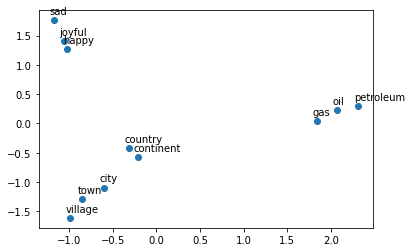

In [85]:
# Using PCA to plot few words

words = ['oil', 'gas', 'happy', 'sad', 'city', 'town',
         'village', 'country', 'continent', 'petroleum', 'joyful']

# given a list of words and the embeddings, it returns a matrix with all the embeddings
X = get_vectors(word_embeddings, words)

result = compute_pca(X, 2)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0] - 0.05, result[i, 1] + 0.1))

plt.show()

# print('You have 11 words each of 300 dimensions thus X.shape is:', X.shape)

The word vectors for 'gas', 'oil' and 'petroleum' appear related to each other,
because their vectors are close to each other.  Similarly, 'sad', 'joyful'
and 'happy' all express emotions, and are also near each other.